In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.model_selection import GridSearchCV
# GridSerchCv- it's help in loop through predefined hyperparametre and fit your model on training set
import os
# os- It's help to automatically perform many operating system tasks.
# like crating, removing, modifying, identifying.
from skimage.transform import resize
# skimage- image processing
# resize- allows to specify an output image shape instead of a scaling factor.
from skimage.io import imread
# imread- image reading and writing via imread
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
import pickle
#  “Pickling” is the process whereby a Python object hierarchy is converted into a byte stream

In [2]:
Categories=['cloudy','desert','green_area','water']
print("If not on drive Please upload all the category images in with same names as given in categories")

If not on drive Please upload all the category images in with same names as given in categories


In [3]:
flat_data_arr=[]
target_arr=[]
datadir=(r'C:\Users\sam\ml project\satelite image classification by using svm')
for i in Categories:
  print(f'loading... category : {i}')
  path=os.path.join(datadir,i)
  for img in os.listdir(path):
    img_array=imread(os.path.join(path,img))
    img_resized=resize(img_array,(150,150,3))
    flat_data_arr.append(img_resized.flatten())
    target_arr.append(Categories.index(i))
  print(f'loaded category:{i} successfully')
flat_data=np.array(flat_data_arr)
target=np.array(target_arr)
df=pd.DataFrame(flat_data)
df['Target']=target
df

loading... category : cloudy
loaded category:cloudy successfully
loading... category : desert
loaded category:desert successfully
loading... category : green_area
loaded category:green_area successfully
loading... category : water
loaded category:water successfully


,0,1,2,3,4,5,6,7,8,9,...,67491,67492,67493,67494,67495,67496,67497,67498,67499,Target
0,0.582013,0.586341,0.528007,0.550474,0.557015,0.493507,0.536045,0.546895,0.492464,0.522954,...,0.556029,0.537255,0.493169,0.548549,0.555686,0.501020,0.555967,0.573058,0.501554,0
1,0.800000,0.823529,0.780392,0.800000,0.823529,0.780392,0.800000,0.823529,0.780392,0.800000,...,0.803922,0.823529,0.772549,0.803922,0.823529,0.772549,0.803922,0.823529,0.772549,0
2,0.541176,0.580392,0.521569,0.541412,0.580392,0.521721,0.545098,0.580392,0.524105,0.541176,...,0.534248,0.572549,0.507860,0.537255,0.572549,0.511106,0.540687,0.572549,0.513725,0
3,0.466667,0.439216,0.400000,0.466667,0.439216,0.400000,0.466667,0.439216,0.400000,0.466667,...,0.456846,0.439216,0.393778,0.454902,0.439216,0.388387,0.454902,0.439216,0.384314,0
4,0.658824,0.662745,0.611765,0.658824,0.662745,0.607843,0.658824,0.662745,0.604837,0.658824,...,0.630458,0.631373,0.572549,0.623765,0.631373,0.572549,0.623529,0.631373,0.571163,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283,0.141176,0.243137,0.338928,0.141176,0.243137,0.338928,0.141176,0.243137,0.338928,0.141176,...,0.132121,0.228663,0.324967,0.130928,0.229857,0.328314,0.131338,0.229446,0.327163,3
284,0.161429,0.258501,0.337255,0.161099,0.258666,0.337255,0.162058,0.258186,0.337255,0.163018,...,0.163582,0.249856,0.337804,0.163582,0.249856,0.337804,0.163582,0.249856,0.337804,3
285,0.098039,0.176471,0.270588,0.098039,0.176471,0.270588,0.098039,0.176471,0.270588,0.098039,...,0.099163,0.177595,0.272925,0.099163,0.177595,0.274118,0.099163,0.177595,0.273708,3
286,0.255704,0.382388,0.358789,0.255294,0.382798,0.358379,0.256487,0.381604,0.359572,0.257681,...,0.258186,0.383677,0.366493,0.258666,0.384156,0.369360,0.258501,0.383991,0.368375,3


In [4]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=77,stratify=y)
print('Splitted Successfully')

Splitted Successfully


In [5]:
param_grid={'C':[0.1,1,10,100],'gamma':[0.0001,0.001,0.1,1],'kernel':['rbf','poly']}
svc=svm.SVC(probability=True)
print("The training of the model is started, please wait for while as it may take few minutes to complete")
model=GridSearchCV(svc,param_grid)
model.fit(x_train,y_train)
print('The Model is trained well with the given images')
model.best_params_

The training of the model is started, please wait for while as it may take few minutes to complete
The Model is trained well with the given images


{'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}

In [6]:
y_pred=model.predict(x_test)
print("The predicted Data is :")
y_pred

The predicted Data is :


array([0, 1, 1, 3, 2, 1, 0, 2, 2, 0, 0, 3, 1, 3, 1, 3, 0, 1, 2, 3, 1, 3,
       0, 0, 3, 3, 2, 2, 2, 3, 1, 1, 0, 0, 3, 1, 2, 1, 0, 1, 2, 2, 2, 1,
       1, 0, 1, 3, 2, 3, 3, 2, 0, 2, 2, 1, 2, 3])

In [7]:
print("The actual data is:")
np.array(y_test)

The actual data is:


array([1, 1, 1, 3, 2, 1, 0, 2, 2, 0, 0, 3, 1, 3, 1, 3, 0, 1, 0, 3, 1, 2,
       0, 0, 3, 3, 3, 2, 3, 3, 1, 1, 1, 0, 3, 1, 2, 0, 0, 0, 2, 2, 2, 1,
       0, 0, 1, 3, 2, 3, 3, 2, 0, 2, 2, 0, 2, 3])

In [8]:
#classification_report(y_pred,y_test)
print(f"The model is {accuracy_score(y_pred,y_test)*100}% accurate")
#confusion_matrix(y_pred,y_test)

The model is 82.75862068965517% accurate


In [9]:
pickle.dump(model,open('img_model.p','wb'))
print("Pickle is dumped successfully")

Pickle is dumped successfully


Enter URL of Imagehttps://ak1.picdn.net/shutterstock/videos/29683741/thumb/12.jpg


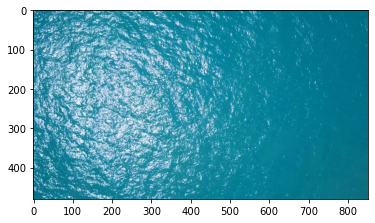

cloudy = 67.93563957226559%
desert = 13.271872613065092%
green_area = 1.888898151944619%
water = 16.9035896627247%
The predicted image is : cloudy
Is the image a cloudy ?(y/n)
n
What is the image?
Enter 0 for cloudy
Enter 1 for desert
Enter 2 for green_area
Enter 3 for water
3
Please wait for a while for the model to learn from this image :)
The model is now 82.75862068965517% accurate
Thank you for your feedback


In [10]:
#print(os.path.abspath(os.getcwd()))
model=pickle.load(open('img_model.p','rb'))

url=input('Enter URL of Image')
img=imread(url)
plt.imshow(img)
plt.show()
img_resize=resize(img,(150,150,3))
l=[img_resize.flatten()]
probability=model.predict_proba(l)
for ind,val in enumerate(Categories):
  print(f'{val} = {probability[0][ind]*100}%')
print("The predicted image is : "+Categories[model.predict(l)[0]])
print(f'Is the image a {Categories[model.predict(l)[0]]} ?(y/n)')
while(True):
  b=input()
  if(b=="y" or b=="n"):
    break
  print("please enter either y or n")

if(b=='n'):
  print("What is the image?")
  for i in range(len(Categories)):
    print(f"Enter {i} for {Categories[i]}")
  k=int(input())
  while(k<0 or k>=len(Categories)):
    print(f"Please enter a valid number between 0-{len(Categories)-1}")
    k=int(input())
  print("Please wait for a while for the model to learn from this image :)")
  flat_arr=flat_data_arr.copy()
  tar_arr=target_arr.copy()
  tar_arr.append(k)
  flat_arr.extend(l)
  tar_arr=np.array(tar_arr)
  flat_df=np.array(flat_arr)
  df1=pd.DataFrame(flat_df)
  df1['Target']=tar_arr
  model1=GridSearchCV(svc,param_grid)
  x1=df1.iloc[:,:-1]
  y1=df1.iloc[:,-1]
  x_train1,x_test1,y_train1,y_test1=train_test_split(x1,y1,test_size=0.20,random_state=77,stratify=y1)
  d={}
  for i in model.best_params_:
    d[i]=[model.best_params_[i]]
  model1=GridSearchCV(svc,d)
  model1.fit(x_train1,y_train1)
  y_pred1=model.predict(x_test1)
  print(f"The model is now {accuracy_score(y_pred1,y_test1)*100}% accurate")
  pickle.dump(model1,open('img_model.p','wb'))
print("Thank you for your feedback")